In [1093]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import pandas as pd
import h5py
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (classification_report, precision_recall_fscore_support,\
    accuracy_score, precision_score, recall_score)
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [1094]:
def scale_dataset(dataframe,X_names, Y_name, oversample=False):
    
    X=dataframe[X_names].values
    Y=dataframe[Y_name].values

    scaler=StandardScaler()
    X = scaler.fit_transform(X) # Transform all values to be scaled properly 

    if oversample:              # If we want to have more of the smaller class 
        ros= RandomOverSampler()
        X, Y = ros.fit_resample(X,Y)

    data=np.hstack((X,np.reshape(Y,(-1,1))))

    return data, X, Y

In [1095]:
path_all='all_data_alt.hdf5'
path='data_2014_alt.hdf5'

cntr=[0]
newDF = pd.DataFrame()  # Creates a new dataframe that's empty

X_names_=['H-1', 'beta_N', 'P_TOT', 'Ipa', 'BTF', 'dRXP', 'Wmhd','Ipolsola','Ipolsoli']
X_names__=['Wmhd','beta_N','Zeff','H-1','Pradtot','ELMi-Han']
X_names=['H-1','ELMa-Han','Ipa']

with h5py.File(path, 'r') as hf:
    years=list(hf.keys())
    for year in years:
        for shot in hf[year].keys():
            if shot!='34306':
                df=pd.DataFrame.from_dict(dict(hf[year][shot]))
                newDF=pd.concat([newDF,df], ignore_index = True)
                newDF=pd.DataFrame.dropna(newDF,how='any',subset=X_names)
                i_BTF = newDF[ (newDF['BTF'] < -2.7) | (newDF['BTF'] > -2.37) ].index
                newDF.drop(i_BTF,inplace=True)
                i_Ipa = newDF[ (newDF['Ipa'] > 1.06*(10**6)) | (newDF['Ipa'] < 0.8*(10**6)) | ((newDF['Ipa'] > 0.85*(10**6)) & (newDF['Ipa'] < 1*(10**6)))].index
                newDF.drop(i_Ipa,inplace=True)
                i_ELMa = newDF[ (newDF['ELMa-Han'] < 0)].index
                newDF.drop(i_ELMa,inplace=True)
                i_H0 = newDF[ (newDF['H-0'] < 0)].index
                newDF.drop(i_H0,inplace=True)
                # i_H5 = newDF[ (newDF['H-5'] < 0)].index
                # newDF.drop(i_H5,inplace=True)
                if cntr[-1]!=newDF.shape[0]:
                    cntr.append(newDF.shape[0])
                    print(shot,cntr[-1])

30269 161
30285 330
30287 499
30288 664
30290 762
30299 958
30300 1140
30301 1336
30559 1427
30606 1428
30607 1466
30609 1505
30613 1628
30639 1747
30640 1858
30690 2004
30770 2091
30771 2181
30772 2272
30795 2401
30798 2531
30799 2605
30800 2709
30801 2888
30802 3073
30846 3224
30858 3280
30894 3302
31040 3453
31041 3638
31045 3786
31046 3971
31201 4228
31238 4479
31252 4496
31253 4577
31264 4667
31342 4737
31343 4859
31344 4980
31348 5167
31364 5322
31373 5449
31374 5638
31376 5657
31377 5725
31378 5777
31379 5842
31380 5918
31381 5990
31382 6112
31383 6239
31384 6366
31397 6521
31461 6694
31463 6877
31465 7041
31466 7190
31467 7375
31495 7376
31527 7549
31618 7745
31639 7864
31641 7957
31643 8068
31658 8161
31659 8282
31660 8391
31662 8587
31689 8720
31690 8856
31723 9052
31733 9248
31742 9440
31750 9636
31893 9678
32416 9719
32428 9728
32433 9743
32443 9749
32533 9778
32720 9779
32724 9781
32986 9871
33061 9879
33062 9881
33301 9887
33342 9889
33423 9890
33544 9899
33545 9983
33555

In [1096]:
# i_train=0
# for i in range(len(cntr)):
#     if 0.8<(cntr[i]/cntr[-1])<0.9:
#         if i_train == 0:
#             i_train=i
#         print(cntr[i],i)
#         i_valid=i
# # print(np.array(cntr))
# frac_train=cntr[i_train]/cntr[-1] #~80%
# frac_valid=cntr[i_valid]/cntr[-1] #~90%
# print(frac_train, frac_valid)
# train, valid, test = np.split(newDF, [int(frac_train*len(newDF)), int(frac_valid*len(newDF))])
# train, test = np.split(newDF, [int(frac_valid*len(newDF))])

In [1097]:
# Random division

lists=np.arange(len(cntr)-1)
# no_train_shots_i=np.random.choice(lists,int(0.1*(len(cntr)-1))) #maybe works
test_shots_i=np.random.choice(lists,int(0.1*(len(cntr)-1)))
mask = np.ones(len(cntr)-1,dtype=bool)
mask[test_shots_i]=0
train_shots_i=lists[mask]

In [1098]:
# Dividing in test and train

test_shots=[]
train_shots=[]
sum_test=0
sum_train=0

for i in test_shots_i:
    test_shots.extend(np.arange(cntr[i],cntr[i+1]))
    sum_test += cntr[i+1] - cntr[i]
for j in train_shots_i:
    train_shots.extend(np.arange(cntr[j],cntr[j+1]))
    sum_train += cntr[j+1] - cntr[j]

DF_test=newDF.iloc[test_shots,:]
DF_train=newDF.iloc[train_shots,:]

print(test_shots_i)
print(sum_train)
print(sum_test)

# print(newDF.to_string())

[ 80 116  12  58  84  51  65  64  20 147 132  40  13  43  33]
15635
1948


In [1099]:
# Producing Histograms

# for label in newDF.columns:
#     try:
#         n_1, bins, _ = plt.hist(newDF[newDF['Density Front']==1][label],bins=50,color='blue',label='front', alpha=0.7, density=True)
#         n_0, _ , _ = plt.hist(newDF[newDF['Density Front']==0][label],bins=bins, color='red',label='no_front', alpha=0.7, density=True)
#         plt.title(label)
#         # plt.ylim(None,0.7*np.nanmax(n_1)) # To take a closer look
#         plt.ylabel('Probability')
#         plt.xlabel(label)
#         plt.legend()
#         plt.savefig('hists/' + label + '.png')
#         plt.show()
#     except ValueError:
#         print('The ' + label + ' is NaN!')

In [1100]:
#We can see there are more of one than the other
print(len(DF_train[DF_train['Density Front']==1]))
print(len(DF_train[DF_train['Density Front']==0]))

# Scaling datasets
train, X_train, Y_train = scale_dataset(DF_train,X_names,'Density Front', oversample=True)
# valid, X_valid, Y_valid = scale_dataset(DF_valid, oversample=False)
test, X_test, Y_test = scale_dataset(DF_test,X_names,'Density Front', oversample=False)

# Checks
# np.set_printoptions(threshold=np.inf)
# print(np.argwhere(np.isnan(X_train)))

4461
11174


In [1101]:
# KNN
knn_model=KNeighborsClassifier(n_neighbors=12) # More than 3, but 7 looks better
knn_model.fit(X_train, Y_train)
Y_pred=knn_model.predict(X_test)
# print('KNN'.center(60))
# print(classification_report(Y_test, Y_pred))

# Naive Bayes
nb_model=GaussianNB()
nb_model.fit(X_train, Y_train)
Y_pred=nb_model.predict(X_test)
# print('Naive Bayes'.center(60))
# print(classification_report(Y_test, Y_pred))

# Log Regression
lg_model=LogisticRegression()
lg_model.fit(X_train, Y_train)
Y_pred=lg_model.predict(X_test)
# print('Log Regression'.center(60))
# print(classification_report(Y_test, Y_pred))


0.20739219712525667
0.09964220617194733


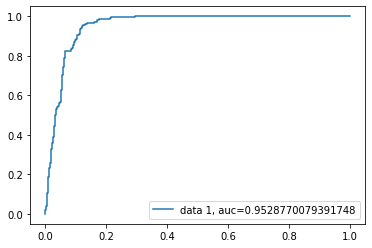

In [1102]:
# Log measures

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import (roc_curve, roc_auc_score)

print(mean_squared_error(Y_test, Y_pred))
print(mean_squared_log_error(Y_test, Y_pred))

y_pred_proba = lg_model.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(Y_test,  y_pred_proba)
auc = roc_auc_score(Y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [1103]:
# SVM
# svm_model=SVC()
# svm_model=svm_model.fit(X_train, Y_train)
# Y_pred=svm_model.predict(X_test)
# print('SVM\n'.center(60))
# print(classification_report(Y_test, Y_pred))

# Neural Networks

In [1104]:
# import tensorflow as tf

In [1105]:
# def plot_history(history):
#   fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))
#   ax1.plot(history.history['loss'], label='loss')
#   ax1.plot(history.history['val_loss'], label='val_loss')
#   ax1.set_xlabel('Epoch')
#   ax1.set_ylabel('Binary crossentropy')
#   ax1.legend()
#   ax1.grid(True)

#   ax2.plot(history.history['accuracy'], label='accuracy')
#   ax2.plot(history.history['val_accuracy'], label='val_accuracy')
#   ax2.set_xlabel('Epoch')
#   ax2.set_ylabel('Accuracy')
#   ax2.legend()
#   ax2.grid(True)

#   plt.savefig('ANN_history.png')
#   plt.show()

In [1106]:
# nn_model = tf.keras.Sequential([
#     tf.keras.layers.Dense(32,activation='relu',input_shape=(len(X_names),)),
#     tf.keras.layers.Dropout(0.1),
#     tf.keras.layers.Dense(32, activation='relu'),
#     tf.keras.layers.Dropout(0.1),
#     tf.keras.layers.Dense(1, activation='sigmoid')
# ])

# nn_model.compile(optimizer=tf.keras.optimizers.Adam(0.001),loss='binary_crossentropy',
#     metrics=['accuracy'])

In [1107]:
# history = nn_model.fit(
#     X_train, Y_train, epochs=100, batch_size=32, validation_split=0.1, verbose=0
# )

In [1108]:
# plot_history(history)

In [1109]:
# Y_pred = nn_model.predict(X_test)
# Y_pred = (Y_pred > 0.5).astype(int).reshape(-1,)
# print(classification_report(Y_test, Y_pred))

In [1110]:
# def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs, X_valid, Y_valid):
#   nn_model = tf.keras.Sequential([
#       tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(3,)),
#       tf.keras.layers.Dropout(dropout_prob),
#       tf.keras.layers.Dense(num_nodes, activation='relu'),
#       tf.keras.layers.Dropout(dropout_prob),
#       tf.keras.layers.Dense(1, activation='sigmoid')
#   ])

#   nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy',
#                   metrics=['accuracy'])
#   history = nn_model.fit(
#     X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data = (X_valid, Y_valid), verbose=0
#   )

#   return nn_model, history

In [1111]:
# least_val_loss = float('inf')
# least_loss_model = None
# epochs=100
# for num_nodes in [16, 32, 64]:
#   for dropout_prob in[0, 0.2]:
#     for lr in [0.01, 0.005, 0.001]:
#       for batch_size in [32, 64, 128]:
#         print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
#         model, history = train_model(X_train, Y_train, num_nodes, dropout_prob, lr, batch_size, epochs, X_valid, Y_valid)
#         plot_history(history)
#         val_loss = model.evaluate(X_valid, Y_valid)[0]
#         if val_loss < least_val_loss:
#           least_val_loss = val_loss
#           least_loss_model = model

In [1112]:
# Y_pred = least_loss_model.predict(X_test)
# Y_pred = (Y_pred > 0.5).astype(int).reshape(-1,)
# print(classification_report(Y_test, Y_pred))

In [1113]:
# N=100
# auc_knn_evol=[]
# i_evol=[]
# for i in range(1,N,2):

#     # KNN
#     knn_model=KNeighborsClassifier(n_neighbors=i) # More than 3, but 7 looks better
#     knn_model.fit(X_train, Y_train)
#     Y_pred=knn_model.predict(X_test)
#     # print(classification_report(Y_test, Y_pred))

#     y_pred_proba = knn_model.predict_proba(X_test)[::,1]
#     fpr, tpr, _ = roc_curve(Y_test, y_pred_proba)
#     auc_knn = roc_auc_score(Y_test, y_pred_proba)
#     auc_knn_evol.append(auc_knn)
#     i_evol.append(i)
#     # print(auc_knn)


In [1114]:
# plt.plot(i_evol[:20],auc_knn_evol[:20])
# plt.xlabel('# of neighboors')
# plt.ylabel('Auc_score of KNN')
# plt.savefig('KNN_evolution.png')
# plt.show()

In [1115]:
scores_KNN=np.zeros_like(precision_recall_fscore_support(Y_test, Y_pred))
scores_NB=np.zeros_like(precision_recall_fscore_support(Y_test, Y_pred))
scores_LG=np.zeros_like(precision_recall_fscore_support(Y_test, Y_pred))
auc_tot_log=0
auc_tot_knn=0
auc_tot_nb=0
N=100

for i in range(N):
    
    # Random division
    np.random.seed(i*10+10)
    # Without discarding 
    lists=np.arange(len(cntr)-1)
    test_shots_i=np.random.choice(lists,int(0.1*(len(cntr)-1)))
    mask = np.ones(len(cntr)-1,dtype=bool)
    mask[test_shots_i]=0
    train_shots_i=lists[mask]
    # Discarding
    # lists=np.arange(len(cntr)-1)
    # no_train_shots_i=np.random.choice(lists,int(0.9*(len(cntr)-1))) #maybe works
    # test_shots_i=np.random.choice(no_train_shots_i,int(0.2*(len(cntr)-1)))
    # mask = np.ones(len(cntr)-1,dtype=bool)
    # mask[no_train_shots_i]=0
    # train_shots_i=lists[mask]

    # Dividing in test and train

    test_shots=[]
    train_shots=[]
    sum_test=0
    sum_train=0

    for i in test_shots_i:  test_shots.extend(np.arange(cntr[i],cntr[i+1]))
    for j in train_shots_i: train_shots.extend(np.arange(cntr[j],cntr[j+1]))

    DF_test=newDF.iloc[test_shots,:]
    DF_train=newDF.iloc[train_shots,:]

    # Scaling datasets
    train, X_train, Y_train = scale_dataset(DF_train,X_names,'Density Front', oversample=True)
    test, X_test, Y_test = scale_dataset(DF_test,X_names,'Density Front', oversample=False)

    # KNN
    knn_model=KNeighborsClassifier(n_neighbors=10) # More than 3, but 7 looks better
    knn_model.fit(X_train, Y_train)
    Y_pred=knn_model.predict(X_test)
    old_tupple=precision_recall_fscore_support(Y_test, Y_pred)
    scores_KNN+=tuple(t/N for t in old_tupple)

    y_pred_proba = knn_model.predict_proba(X_test)[::,1]
    fpr, tpr, _ = roc_curve(Y_test, y_pred_proba)
    auc_knn = roc_auc_score(Y_test, y_pred_proba)
    auc_tot_knn+=auc_knn/N

    # Naive Bayes
    nb_model=GaussianNB()
    nb_model.fit(X_train, Y_train)
    Y_pred=nb_model.predict(X_test)
    old_tupple2=precision_recall_fscore_support(Y_test, Y_pred)
    scores_NB+=tuple(t/N for t in old_tupple2)

    y_pred_proba = nb_model.predict_proba(X_test)[::,1]
    fpr, tpr, _ = roc_curve(Y_test, y_pred_proba)
    auc_nb = roc_auc_score(Y_test, y_pred_proba)
    auc_tot_nb+=auc_nb/N

    # Log Regression
    lg_model=LogisticRegression()
    lg_model.fit(X_train, Y_train)
    Y_pred=lg_model.predict(X_test)
    old_tupple3=precision_recall_fscore_support(Y_test, Y_pred)
    scores_LG+=tuple(t/N for t in old_tupple3)

    y_pred_proba = lg_model.predict_proba(X_test)[::,1]
    fpr, tpr, _ = roc_curve(Y_test, y_pred_proba)
    auc_log = roc_auc_score(Y_test, y_pred_proba)
    auc_tot_log+=auc_log/N


In [1116]:
def better_print(score):
     print('     precision    recall     f1-score')
     print('0       ' + str(round(score[0][0],2)) + '      ' + str(round(score[1][0],2)) +\
          '         ' + str(round(score[2][0],2)))
     print('1       ' + str(round(score[0][1],2)) + '      ' + str(round(score[1][1],2)) +\
          '         ' + str(round(score[2][1],2)) + '\n')

In [1117]:
# print('KNN\n'.center(40))
# better_print(scores_KNN)
# print('KNN accuracy: ' + str(round(auc_tot_knn,2)))
# print('Naive Bayes\n'.center(40))
# better_print(scores_NB)
# print('NB accuracy: ' + str(round(auc_tot_nb,2)))
print('Log Regression\n'.center(40))
better_print(scores_LG)
print('Log accuracy: ' + str(round(auc_tot_log,2)))


            Log Regression
             
     precision    recall     f1-score
0       0.89      0.76         0.82
1       0.53      0.76         0.62

Log accuracy: 0.83


In [1118]:
# SVM

scores_SVM=np.zeros_like(precision_recall_fscore_support(Y_test, Y_pred))
auc_tot_svm=0
N=20

for i in range(N):
    # Random division
    np.random.seed(i*10+10)
    # Without discarding 
    lists=np.arange(len(cntr)-1)
    test_shots_i=np.random.choice(lists,int(0.1*(len(cntr)-1)))
    mask = np.ones(len(cntr)-1,dtype=bool)
    mask[test_shots_i]=0
    train_shots_i=lists[mask]
    # Discarding
    # lists=np.arange(len(cntr)-1)
    # no_train_shots_i=np.random.choice(lists,int(0.2*(len(cntr)-1))) #maybe works
    # test_shots_i=np.random.choice(no_train_shots_i,int(0.1*(len(cntr)-1)))
    # mask = np.ones(len(cntr)-1,dtype=bool)
    # mask[no_train_shots_i]=0
    # train_shots_i=lists[mask]

    # Dividing in test and train

    test_shots=[]
    train_shots=[]
    sum_test=0
    sum_train=0

    for i in test_shots_i:  test_shots.extend(np.arange(cntr[i],cntr[i+1]))
    for j in train_shots_i: train_shots.extend(np.arange(cntr[j],cntr[j+1]))

    DF_test=newDF.iloc[test_shots,:]
    DF_train=newDF.iloc[train_shots,:]

    # Scaling datasets
    train, X_train, Y_train = scale_dataset(DF_train,X_names,'Density Front', oversample=True)
    test, X_test, Y_test = scale_dataset(DF_test,X_names,'Density Front', oversample=False)

    svm_model=SVC()
    svm_model=svm_model.fit(X_train, Y_train)
    Y_pred=svm_model.predict(X_test)
    old_tupple4=precision_recall_fscore_support(Y_test, Y_pred)
    scores_SVM+=tuple(t/N for t in old_tupple4)

print('SVM\n'.center(40))
better_print(scores_SVM)


                  SVM
                  
     precision    recall     f1-score
0       0.92      0.69         0.78
1       0.49      0.84         0.6



In [1119]:
# ANN

# scores_nn=np.zeros_like(precision_recall_fscore_support(Y_test, Y_pred))
# N=20

# for i in range(N):
#     # Random division
#     np.random.seed(i*10+10)
#     # Without discarding 
#     lists=np.arange(len(cntr)-1)
#     test_shots_i=np.random.choice(lists,int(0.1*(len(cntr)-1)))
#     mask = np.ones(len(cntr)-1,dtype=bool)
#     mask[test_shots_i]=0
#     train_shots_i=lists[mask]
#     # Discarding
#     # lists=np.arange(len(cntr)-1)
#     # no_train_shots_i=np.random.choice(lists,int(0.2*(len(cntr)-1))) #maybe works
#     # test_shots_i=np.random.choice(no_train_shots_i,int(0.1*(len(cntr)-1)))
#     # mask = np.ones(len(cntr)-1,dtype=bool)
#     # mask[no_train_shots_i]=0
#     # train_shots_i=lists[mask]

#     # Dividing in test and train

#     test_shots=[]
#     train_shots=[]
#     sum_test=0
#     sum_train=0

#     for i in test_shots_i:  test_shots.extend(np.arange(cntr[i],cntr[i+1]))
#     for j in train_shots_i: train_shots.extend(np.arange(cntr[j],cntr[j+1]))

#     DF_test=newDF.iloc[test_shots,:]
#     DF_train=newDF.iloc[train_shots,:]

#     # Scaling datasets
#     train, X_train, Y_train = scale_dataset(DF_train,X_names,'Density Front', oversample=True)
#     test, X_test, Y_test = scale_dataset(DF_test,X_names,'Density Front', oversample=False)

#     nn_model = tf.keras.Sequential([
#     tf.keras.layers.Dense(32,activation='relu',input_shape=(len(X_names),)),
#     tf.keras.layers.Dropout(0.1),
#     tf.keras.layers.Dense(32, activation='relu'),
#     tf.keras.layers.Dropout(0.1),
#     tf.keras.layers.Dense(1, activation='sigmoid')
#     ])

#     nn_model.compile(optimizer=tf.keras.optimizers.Adam(0.001),loss='binary_crossentropy',
#         metrics=['accuracy'])
#     history = nn_model.fit(
#         X_train, Y_train, epochs=50, batch_size=32, validation_split=0.1
#     )
#     Y_pred = nn_model.predict(X_test)
#     Y_pred = (Y_pred > 0.5).astype(int).reshape(-1,)
#     old_tupple4=precision_recall_fscore_support(Y_test, Y_pred)
#     scores_nn+=tuple(t/N for t in old_tupple4)

# print('NN\n'.center(40))
# better_print(scores_nn)